## JuPedSim

In diesem Tutorial wird eine Simulation mit `jpscore` in einem einfachen Setup durchgeführt. 

Eine Dokumentation der verwendeten Dateien ist unter:

- Die Trajektorie-Datei (txt oder xml) (siehe [Dokumentation](http://www.jupedsim.org/jpscore/jpscore_trajectory.html))
- Die Geometriedatei (siehe [Dokumentation](http://www.jupedsim.org/jpscore/jpscore_geometry.html)) 
- Die Projektdatei von jpscore, genannt inifile (siehe [Dokumentation](http://www.jupedsim.org/jpscore/jpscore_inifile.html))


## Wie benutze ich ein Jupyter-Notebook

Dieser `Jupyter-Notebook` besteht aus verschiedennen Zellen (Cells). 

Sie können alle Zellen ausführen indem Sie in dem Menü `Run --> Run All Cells` auswählen.

Alternative, können Sie einzelne Zellen ausführen, indem Sie auf die entsprechende Zelle klicken und `Run --> Run Selected Cells` auswählen. 

**Tip**: Die Ausführung von einer ausgewählten Zelle geht auch mit dem Kürzel `Shift+Enter` (Also auf den Tasten `Alt` und `Enter` gleichzeitig drücken)


## Simulation

Mit den Dateien `ini_jpscore.xml` und `geometry.xml` können wir eine einfache Simulation wie folgt durchführen:

In [34]:
%run 00_Install.ipynb

jpscore and jpsreport exist. Nothing to install.


In [65]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [35]:
%%bash
$HOME/usr/bin/jpscore ini_jpscore.xml

[2020-05-03 10:28:39.988] [info] Starting JuPedSim - JPScore
[2020-05-03 10:28:39.988] [info] Version 0.8.4
[2020-05-03 10:28:39.988] [info] Commit id v0.8.4-958-g263687e2
[2020-05-03 10:28:39.988] [info] Commit date Tue Apr 28 11:25:58 2020
[2020-05-03 10:28:39.988] [info] Build from branch master
[2020-05-03 10:28:39.988] [info] Build with g++(9.3.0)
[2020-05-03 10:28:39.988] [info] Loading and parsing the project file <ini_jpscore.xml>
[2020-05-03 10:28:39.989] [info] Random seed <12542>
[2020-05-03 10:28:39.989] [info] Maximal simulation time <200.00> seconds
[2020-05-03 10:28:39.989] [info] Geometry file <geometry.xml>
[2020-05-03 10:28:39.989] [info] Using 1 OpenMP threads, 1 available.
[2020-05-03 10:28:39.989] [info] Show statistics: true
[2020-05-03 10:28:39.989] [info] Output Path configured </home/mchraibi/results>
[2020-05-03 10:28:39.989] [info] Output file  </home/mchraibi/results/150trajectories.txt>
[2020-05-03 10:28:39.989] [info] In format <plain> at <8> frames per se

In [36]:
inifile = "ini_jpscore.xml"
d = parse(inifile)
Npeds = int(dict(d.getElementsByTagName('group')[0].attributes.items())['number'])
print("Npeds:", Npeds)

Npeds: 150


# Visualisierung der Trajektorien

*Warnung*: Die Visualisierung einer großen Trajektoriendatei kann einige Minuten dauern. Also, Geduld! 

Der Name der Geometrie- und Trajektorie-Dateien werden automatisch aus der Ini-Datei extrahiert. 
Darüber hinaus wird auch der Wert der Frames pro Sekunde (*fps*) aus der Ini-Datei extrahiert.

In [66]:
%%time
%run 02_vis.ipynb
HTML(ani.to_html5_video())

Frame  - min:      0 - max:    588
PersID - min:      1 - max:    150
Xmin:   0.19 m - Xmax:  11.00 m
Ymin:   0.15 m - Ymax:   4.84 m
Zmin:   0.00 m - Zmax:   0.00 m
CPU times: user 55.1 s, sys: 32.5 s, total: 1min 27s
Wall time: 28.4 s


----

## N(t)-Kurve zeichnen

In dem Ordner `results` wird eine Flow-Datei erzeugt, die zwei Spalten enthält:

Abhängig von der Trajektoriennamen könnte diese Datei so heissen `flow_exit_id_0_trajectories.txt`.

**Achtung:**
Wenn die Trajektoriendatei in der `ini_jpscore.xml` geändert wird, muss der Wert der Variable `Nt_file` (siehe Zelle unten) dementsprechend **angepasst** werden.

Zum Beispiel: 

| Trajektorienname  |  Flow-Datei |
| ------------- |:-------------:|
| trajectories50.txt | flow_exit_id_0_trajectories50.txt|
| trajectories100.txt | flow_exit_id_0_trajectories100.txt|
| trajectories150.txt | flow_exit_id_0_trajectories150.txt|



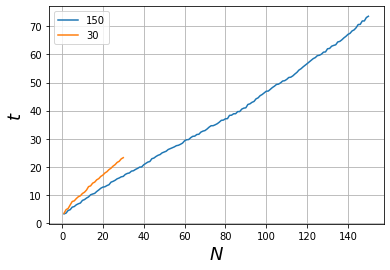

In [51]:
%run libs/imports
%matplotlib inline
import glob
files = glob.glob("results/flow*.txt")

for f in files:
    print()
    data = np.loadtxt(f)
    plt.plot(data[:, 1],data[:,0],label=f.split("_")[-1].split("trajectories.txt")[0])
    
plt.ylabel("$t$", size=18)
plt.xlabel("$N$", size=18)
plt.grid()
plt.legend()

## jpsreport


In [47]:
%%bash
$HOME/usr/bin/jpsreport ini_jpsreport.xml

----
JuPedSim - JPSreport

Current date   : Sun May 03 10:46:31 2020
Version        : 0.8.4
Compiler       : g++ (9.3.0)
Commit hash    : v0.8.4-958-g263687e2
Commit date    : Tue Apr 28 11:25:58 2020
Branch         : master
INFO: 	Parsing the ini file <ini_jpsreport.xml>
INFO:	logfile </home/mchraibi/log_jpsreport.txt>
INFO:	Success with Method A using measurement area id 2
INFO: 	End Analysis for the file: 150trajectories.txt
Time elapsed:	 1.1431 [s]


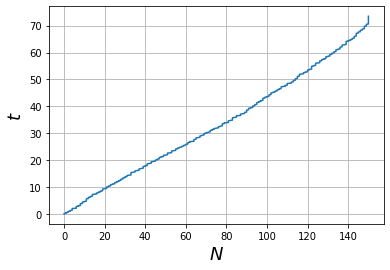

In [50]:
Nt_file="Output/Fundamental_Diagram/FlowVelocity/Flow_NT_%strajectories.txt_id_2.dat"%Npeds
if not os.path.exists(Nt_file):
    print("File {} does not exist".format(Nt_file))
else:
    data = np.loadtxt(Nt_file)
    plt.plot(data[:, 1],data[:,0])
    plt.ylabel("$t$", size=18)
    plt.xlabel("$N$", size=18)
    plt.grid()

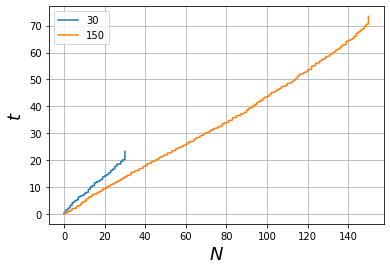

In [63]:
files = glob.glob("Output/Fundamental_Diagram/FlowVelocity/Flow_NT_*trajectories.txt_id_2.dat")
for f in files:
    data = np.loadtxt(f)
    plt.plot(data[:, 1],data[:,0], label=f.split("trajectories.txt")[0].split("_")[-1])
    
plt.ylabel("$t$", size=18)
plt.xlabel("$N$", size=18)
plt.legend()
plt.grid()

## Aufräumen

Dieser Schritt ist **optional**. 

Um den Simulationsordners `results` zu löschen, entfernen Sie von der Zelle unten das Zeichen `#` und führen Sie anschliessend die Zelle mit `Alt+Enter` 

In [41]:
%%bash
#rm -r results 